In [ ]:
!pip install newsapi-python

In [ ]:
api_key = "427307965f7b46b6b9bd9cf441082961" #replace with your own api key

In [ ]:
from newsapi import NewsApiClient
import pandas as pd
newsapi = NewsApiClient(api_key = api_key)

In [ ]:
sources = newsapi.get_sources(country = "us", language = "en")

In [ ]:
us_sources = [s["id"] for s in sources["sources"][:20]]
print("Top 20 US Sources:", us_sources)

Top 20 US Sources: ['abc-news', 'al-jazeera-english', 'ars-technica', 'associated-press', 'axios', 'bleacher-report', 'bloomberg', 'breitbart-news', 'business-insider', 'buzzfeed', 'cbs-news', 'cnn', 'crypto-coins-news', 'engadget', 'entertainment-weekly', 'espn', 'espn-cric-info', 'fortune', 'fox-news', 'fox-sports']


In [ ]:
articles = newsapi.get_everything(q = "politics", sources = ",".join(us_sources), language = "en", sort_by = "relevancy")

In [ ]:
print(articles['articles'])

[{'source': {'id': 'business-insider', 'name': 'Business Insider'}, 'author': 'Emily Stewart', 'title': 'The new reality of study abroad: Higher costs, more politics, fewer Aperol spritzes', 'description': 'American students going abroad are facing higher tuition, more expenses, more awkward conversations, and fewer fun drinks.', 'url': 'https://www.businessinsider.com/american-college-students-study-abroad-struggle-tuition-prices-trump-travel-2025-11', 'urlToImage': 'https://i.insider.com/6925f8c2abd5e944effb78fe?width=1200&format=jpeg', 'publishedAt': '2025-11-26T09:23:01Z', 'content': "It's been an interesting five years for Americans studying abroad. The pandemic slammed the brakes on many international programs, sending would-be global citizens back to their parents' homes. Now, … [+13465 chars]"}, {'source': {'id': 'abc-news', 'name': 'ABC News'}, 'author': 'ABC News', 'title': "WATCH: Obama: 'Country and our politics are in a pretty dark place right now'", 'description': 'Jersey

In [ ]:
print(f"\nFound {len(articles['articles'])} articles from top 20 US sources.\n")
for a in articles['articles'][:10]:
    print(f"{a['title']} — {a['source']['name']}")


Found 100 articles from top 20 US sources.

The new reality of study abroad: Higher costs, more politics, fewer Aperol spritzes — Business Insider
WATCH: Obama: 'Country and our politics are in a pretty dark place right now' — ABC News
Jim Avila, former longtime ABC News senior correspondent, dies at 69 — ABC News
Ex-FTC chair Lina Khan joins Mamdani's transition team, calling his victory a rebuke of 'outsized corporate power' — Business Insider
Mamdani is officially NYC mayor — read his full acceptance speech here — Business Insider
15 "Hidden Gem" Entry-Level Jobs That Can Set You Up For Long-Term Career Success — Buzzfeed
Trump says he'd feel comfortable living in Zohran Mamdani's NYC — Business Insider
Days after their friendly meeting, Mamdani says he still thinks Trump is a fascist — ABC News
Politicians are increasingly pushing AI-generated content. It's scaring other politicians. — Business Insider
I left my six-figure law job and bought a mobile-home park. Despite the drawbac

In [ ]:
records = []
for article in articles['articles']:
    records.append({
        "source": article['source']['name'],
        "author": article['author'],
        "title": article['title'],
        "description": article['description'],
        "url": article['url'],
        "published_at": article['publishedAt'],
        "content": article['content']
    })

df = pd.DataFrame(records)

In [ ]:
df.head()

,source,author,title,description,url,published_at,content
0,Business Insider,Emily Stewart,"The new reality of study abroad: Higher costs,...",American students going abroad are facing high...,https://www.businessinsider.com/american-colle...,2025-11-26T09:23:01Z,It's been an interesting five years for Americ...
1,ABC News,ABC News,WATCH: Obama: 'Country and our politics are in...,Jersey's race for governor at a rally in Newar...,https://abcnews.go.com/Politics/video/obama-co...,2025-11-02T19:50:36Z,<ul><li>New poll numbers 1 year ahead of midte...
2,ABC News,ABC NEWS,"Jim Avila, former longtime ABC News senior cor...",Jim Avila served as an ABC News senior corresp...,https://abcnews.go.com/US/jim-avila-former-lon...,2025-11-13T16:44:57Z,"Jim Avila, a former longtime ABC News senior c..."
3,Business Insider,Alice Tecotzky,Ex-FTC chair Lina Khan joins Mamdani's transit...,"During her time leading the FTC, Khan drew the...",https://www.businessinsider.com/lina-khan-join...,2025-11-05T17:55:21Z,Khan supported Mamdani during the campaign and...
4,Business Insider,Will Martin,Mamdani is officially NYC mayor — read his ful...,Zohran Mamdani beat former Democratic Gov. And...,https://www.businessinsider.com/zohran-mamdani...,2025-11-05T11:46:26Z,Zohran Mamdani gives his victory speech after ...


In [ ]:
df.shape

(100, 7)

In [ ]:
newsapi = NewsApiClient(api_key=api_key)

queries = [
    "immigration",
    "climate change",
    "gun control",
    "healthcare reform",
    "economic inequality",
    "foreign policy",
    "education policy",
    "national security",
    "abortion",
    "crime and policing"
]

In [ ]:
left_sources = [
    "cnn", "the-washington-post", "the-guardian-uk", "huffpost", "msnbc-news"
]

center_sources = [
    "reuters", "associated-press", "bloomberg", "bbc-news", "npr"
]

right_sources = [
    "fox-news", "the-wall-street-journal", "national-review", "newsmax", "breitbart-news"
]

bias_groups = {
    "left": left_sources,
    "cetenr": center_sources,
    "right": right_sources
}


In [ ]:
all_articles = []

for bias, sources in bias_groups.items():
    for q in queries:
        print(f"Fetching '{q}' articles from {bias}-leaning sources...")

        try:
            result = newsapi.get_everything(
                q=q,
                sources=",".join(sources[:20]),  # ≤20 sources per call
                language='en',
                sort_by='relevancy',
                page_size=100
            )

            for a in result.get('articles', []):
                all_articles.append({
                    "query": q,
                    "bias": bias,
                    "source": a['source']['name'],
                    "title": a['title'],
                    "description": a['description'],
                    "url": a['url'],
                    "publishedAt": a['publishedAt'],
                    "content": a['content']
                })
        except Exception as e:
            print(f"⚠️ Error fetching {q} for {bias}: {e}")

Fetching 'immigration' articles from left-leaning sources...
Fetching 'climate change' articles from left-leaning sources...
Fetching 'gun control' articles from left-leaning sources...
Fetching 'healthcare reform' articles from left-leaning sources...
Fetching 'economic inequality' articles from left-leaning sources...
Fetching 'foreign policy' articles from left-leaning sources...
Fetching 'education policy' articles from left-leaning sources...
Fetching 'national security' articles from left-leaning sources...
Fetching 'abortion' articles from left-leaning sources...
Fetching 'crime and policing' articles from left-leaning sources...
Fetching 'immigration' articles from cetenr-leaning sources...
Fetching 'climate change' articles from cetenr-leaning sources...
Fetching 'gun control' articles from cetenr-leaning sources...
Fetching 'healthcare reform' articles from cetenr-leaning sources...
Fetching 'economic inequality' articles from cetenr-leaning sources...
Fetching 'foreign polic

**Important**

In [ ]:
df = pd.DataFrame(all_articles)
df.head()

,query,bias,source,title,description,url,publishedAt,content
0,immigration,left,CNN,Affordability crisis rattling mom-and-pop shop...,Affordability crisis rattling mom-and-pop shop...,https://www.cnn.com/2025/11/18/business/prices...,2025-11-18T15:07:37Z,Surging import costs. Mounting payroll and hea...
1,immigration,left,CNN,Mother was taken into ICE custody. Then public...,Bruna Ferreira came to the US from Brazil as a...,https://www.cnn.com/2025/11/26/politics/ice-ka...,2025-11-27T14:00:13Z,Bruna Ferreira came to the US from Brazil as a...
2,immigration,left,CNN,White House officials prepare for potential ca...,The White House is preparing for possible turn...,https://www.cnn.com/2025/11/21/politics/trump-...,2025-11-21T14:00:14Z,The White House is preparing for possible turn...
3,immigration,left,CNN,Colombian president says oil 'at the heart of'...,As US military activity ramps up in the Caribb...,https://www.cnn.com/2025/11/26/americas/colomb...,2025-11-26T14:00:17Z,As US military activity ramps up in the Caribb...
4,immigration,left,CNN,Judge orders improvements at a Chicago-area im...,A federal judge on Wednesday ordered authoriti...,https://www.cnn.com/2025/11/05/us/chicago-immi...,2025-11-06T00:38:39Z,A federal judge on Wednesday ordered authoriti...


In [ ]:
df.shape

(859, 8)

In [ ]:
import seaborn as sns


In [ ]:
df["len"] = df["content"].str.len()

<Axes: xlabel='len', ylabel='Count'>

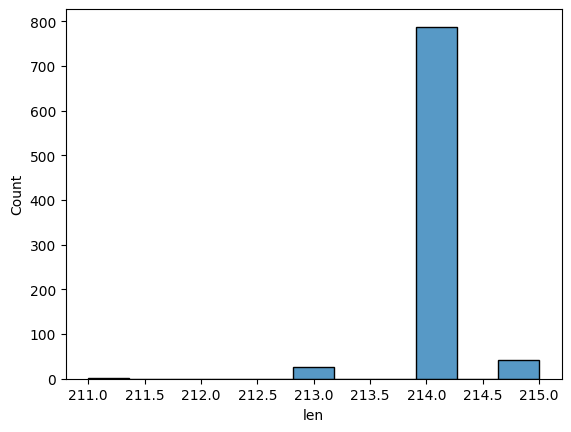

In [ ]:
sns.histplot(data = df, x = "len")

In [ ]:
df["content"][0]

'Surging import costs. Mounting payroll and healthcare expenses. A shortage of affordable loans. And a stressed-out workforce. Small businesses are facing mounting pressure from Americas affordability… [+6045 chars]'

In [ ]:
!pip install trafilatura tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 837.9/837.9 kB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.7/274.7 kB 19.2 MB/s eta 0:00:00


In [ ]:
from tqdm import tqdm
import trafilatura

In [ ]:
def fetch_full_text(url):
    try:
        downloaded = trafilatura.fetch_url(url)
        if downloaded:
            text = trafilatura.extract(downloaded, include_comments=False, include_tables=False)
            return text
    except Exception:
        pass
    return None

print("\n⏳ Downloading full article text (this may take a few minutes)...")
tqdm.pandas()
df["full_text"] = df["url"].progress_apply(fetch_full_text)



⏳ Downloading full article text (this may take a few minutes)...


  5%|▌         | 45/859 [00:42<04:36,  2.94it/s]WARNING:urllib3.connectionpool:Retrying (Retry(total=1, connect=0, read=None, redirect=2, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=30)")': /entertainment/movies/2025/11/01/house-dynamite-bigelow-nuclear-war-experts/
ERROR:trafilatura.downloads:download error: https://www.washingtonpost.com/entertainment/movies/2025/11/01/house-dynamite-bigelow-nuclear-war-experts/ HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Max retries exceeded with url: /entertainment/movies/2025/11/01/house-dynamite-bigelow-nuclear-war-experts/ (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=30)"))
 10%|█         | 87/859 [03:52<06:34,  1.96it/s]WARNING:urllib3.connectionpool:Retrying (Retry(total=1, connect=0, read=None, redirect=2, status=None)) after connection broken 

In [ ]:
df['full_len'] = df['full_text'].str.len()

<Axes: xlabel='full_len', ylabel='Count'>

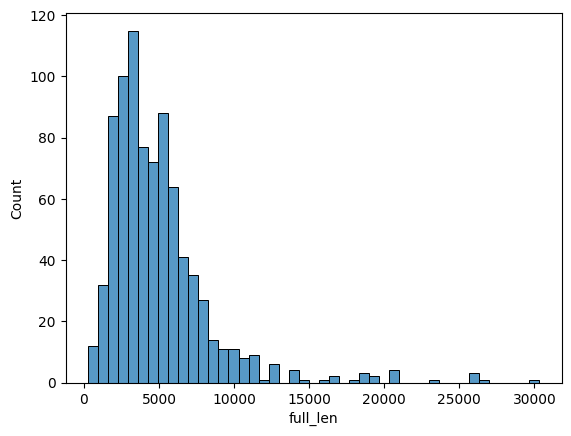

In [ ]:
sns.histplot(data=df,x='full_len')

<Axes: ylabel='full_len'>

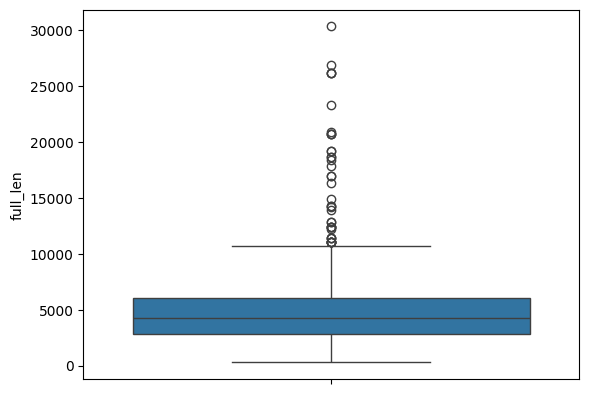

In [ ]:
sns.boxplot(data=df,y='full_len')

In [ ]:
df.to_csv("news.csv")

In [ ]:
news_df = pd.read_csv("news.csv")